# PROJETO DS_II

## 0. **** IMPORTS ****

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os
import requests
import time
import tweepy
from PIL import Image
from io import BytesIO
%matplotlib inline

## 1. **** Gathering Data ****

In [2]:
# Import twitter id's into a dataframe
df_wrdogs = pd.read_csv('twitter-archive-enhanced.csv')
#
# Make directory if it doesn't already exist
folder_name = 'downloads'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
#
# Download image predictions programatically
img_pred = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
#
response = requests.get(img_pred)
with open(os.path.join(folder_name, img_pred.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
#
# Import classification into a dataframe
#
df_imgpred = pd.read_csv('downloads/image-predictions.tsv', sep='\t')
#

In [3]:
# Debugging code
test_ids = df_wrdogs['tweet_id'].head()
#print(img_pred.split('/')[-1])

In [4]:
# Authenticate to tweeter using the APP and Keys, Tokens created (Oauth)
#
auth = tweepy.OAuthHandler("kQ0vIRlEEfxtPS0w00npN94jc", "RJm7G4cpnbbK9721CDDnqCG2l9rDjWKHhevrtzf0170MjG5xHv")
auth.set_access_token("221352972-9VVTxjYsqjGTUcjGa5JJurHcHUQuXfEDyaPup9IX", "JlTzfMRbFIsoo2oXhufcQCMeIUlWbFWwwVuZnOaTWyMvI")
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)
#

In [5]:
# Return number of retweets and favorites based on the tweet id's read from the udacity file 
# and save it
#
twt_list = []
tid_error = []
for twt in df_wrdogs['tweet_id']:
    try:
        start = time.time()
        tweet_status = api.get_status(twt, tweet_mode='extended')
        # Append to twt_list of dictionaries
        twt_list.append({'tweet_id': int(twt),
                         'fav_count': int(tweet_status.favorite_count),
                         'retweet_count': int(tweet_status.retweet_count)})
        end = time.time()
        print("Tweet_Id - " + str(twt))
        print("Time Elapsed - " + str(end - start))
    except tweepy.TweepError as err:
        print("Tweet_Id - " + str(twt))
        print("Error_Code - " + str(err.args[0][0]['code']))
        print("Error_Message - " + str(err.args[0][0]['message']))
        tid_error.append({'tweet_id': int(twt),
                          'error_code': int(err.args[0][0]['code']),
                          'error_message': str(err.args[0][0]['message'])})
#

Tweet_Id - 892420643555336193
Time Elapsed - 0.2921905517578125
Tweet_Id - 892177421306343426
Time Elapsed - 0.26305484771728516
Tweet_Id - 891815181378084864
Time Elapsed - 0.2848820686340332
Tweet_Id - 891689557279858688
Time Elapsed - 0.27104854583740234
Tweet_Id - 891327558926688256
Time Elapsed - 0.25150060653686523
Tweet_Id - 891087950875897856
Time Elapsed - 0.26143956184387207
Tweet_Id - 890971913173991426
Time Elapsed - 0.246931791305542
Tweet_Id - 890729181411237888
Time Elapsed - 0.261333703994751
Tweet_Id - 890609185150312448
Time Elapsed - 0.2582387924194336
Tweet_Id - 890240255349198849
Time Elapsed - 0.25060057640075684
Tweet_Id - 890006608113172480
Time Elapsed - 0.24434804916381836
Tweet_Id - 889880896479866881
Time Elapsed - 0.2726786136627197
Tweet_Id - 889665388333682689
Time Elapsed - 0.2718491554260254
Tweet_Id - 889638837579907072
Time Elapsed - 0.27225279808044434
Tweet_Id - 889531135344209921
Time Elapsed - 0.2683084011077881
Tweet_Id - 889278841981685760
Time 

Tweet_Id - 868552278524837888
Time Elapsed - 0.2761223316192627
Tweet_Id - 867900495410671616
Time Elapsed - 0.2690401077270508
Tweet_Id - 867774946302451713
Time Elapsed - 0.273317813873291
Tweet_Id - 867421006826221569
Time Elapsed - 0.30797815322875977
Tweet_Id - 867072653475098625
Time Elapsed - 0.3048686981201172
Tweet_Id - 867051520902168576
Time Elapsed - 0.40341782569885254
Tweet_Id - 866816280283807744
Error_Code - 144
Error_Message - No status found with that ID.
Tweet_Id - 866720684873056260
Time Elapsed - 0.403759241104126
Tweet_Id - 866686824827068416
Time Elapsed - 0.25026369094848633
Tweet_Id - 866450705531457537
Time Elapsed - 0.2565491199493408
Tweet_Id - 866334964761202691
Time Elapsed - 0.24421977996826172
Tweet_Id - 866094527597207552
Time Elapsed - 0.26817774772644043
Tweet_Id - 865718153858494464
Time Elapsed - 0.3114755153656006
Tweet_Id - 865359393868664832
Time Elapsed - 0.25002217292785645
Tweet_Id - 865006731092295680
Time Elapsed - 0.3132655620574951
Tweet_I

Tweet_Id - 844973813909606400
Time Elapsed - 0.2635335922241211
Tweet_Id - 844704788403113984
Time Elapsed - 0.26447534561157227
Tweet_Id - 844580511645339650
Time Elapsed - 0.3022935390472412
Tweet_Id - 844223788422217728
Time Elapsed - 0.27358102798461914
Tweet_Id - 843981021012017153
Time Elapsed - 0.2512803077697754
Tweet_Id - 843856843873095681
Time Elapsed - 0.3104996681213379
Tweet_Id - 843604394117681152
Time Elapsed - 0.28835606575012207
Tweet_Id - 843235543001513987
Time Elapsed - 0.2484300136566162
Tweet_Id - 842892208864923648
Error_Code - 144
Error_Message - No status found with that ID.
Tweet_Id - 842846295480000512
Time Elapsed - 0.25728750228881836
Tweet_Id - 842765311967449089
Time Elapsed - 0.2698030471801758
Tweet_Id - 842535590457499648
Time Elapsed - 0.2587108612060547
Tweet_Id - 842163532590374912
Time Elapsed - 0.2482905387878418
Tweet_Id - 842115215311396866
Time Elapsed - 0.22365593910217285
Tweet_Id - 841833993020538882
Time Elapsed - 0.24446845054626465
Tweet

Tweet_Id - 827653905312006145
Time Elapsed - 0.24728727340698242
Tweet_Id - 827600520311402496
Time Elapsed - 0.20107555389404297
Tweet_Id - 827324948884643840
Time Elapsed - 0.27985405921936035
Tweet_Id - 827228250799742977
Error_Code - 144
Error_Message - No status found with that ID.
Tweet_Id - 827199976799354881
Time Elapsed - 0.24563193321228027
Tweet_Id - 826958653328592898
Time Elapsed - 0.23923945426940918
Tweet_Id - 826848821049180160
Time Elapsed - 0.23323774337768555
Tweet_Id - 826615380357632002
Time Elapsed - 0.21833539009094238
Tweet_Id - 826598799820865537
Time Elapsed - 0.22040367126464844
Tweet_Id - 826598365270007810
Time Elapsed - 0.22231292724609375
Tweet_Id - 826476773533745153
Time Elapsed - 0.26177334785461426
Tweet_Id - 826240494070030336
Time Elapsed - 0.2227332592010498
Tweet_Id - 826204788643753985
Time Elapsed - 0.2447655200958252
Tweet_Id - 826115272272650244
Time Elapsed - 0.25423574447631836
Tweet_Id - 825876512159186944
Time Elapsed - 0.24570012092590332

Tweet_Id - 812747805718642688
Time Elapsed - 0.4494755268096924
Tweet_Id - 812709060537683968
Time Elapsed - 0.29712724685668945
Tweet_Id - 812503143955202048
Time Elapsed - 0.25540614128112793
Tweet_Id - 812466873996607488
Time Elapsed - 0.3218505382537842
Tweet_Id - 812372279581671427
Time Elapsed - 0.2267470359802246
Tweet_Id - 811985624773361665
Time Elapsed - 0.2180793285369873
Tweet_Id - 811744202451197953
Time Elapsed - 0.21579957008361816
Tweet_Id - 811647686436880384
Time Elapsed - 0.22546625137329102
Tweet_Id - 811627233043480576
Time Elapsed - 0.21875715255737305
Tweet_Id - 811386762094317568
Time Elapsed - 0.23893332481384277
Tweet_Id - 810984652412424192
Time Elapsed - 0.24868202209472656
Tweet_Id - 810896069567610880
Time Elapsed - 0.2123088836669922
Tweet_Id - 810657578271330305
Time Elapsed - 0.22667837142944336
Tweet_Id - 810284430598270976
Time Elapsed - 0.22360444068908691
Tweet_Id - 810254108431155201
Time Elapsed - 0.23791193962097168
Tweet_Id - 809920764300447744


Tweet_Id - 793845145112371200
Time Elapsed - 0.2589595317840576
Tweet_Id - 793614319594401792
Time Elapsed - 0.27980852127075195
Tweet_Id - 793601777308463104
Time Elapsed - 0.24557995796203613
Tweet_Id - 793500921481273345
Time Elapsed - 0.30468225479125977
Tweet_Id - 793286476301799424
Time Elapsed - 0.2656219005584717
Tweet_Id - 793271401113350145
Time Elapsed - 0.2718489170074463
Tweet_Id - 793256262322548741
Time Elapsed - 0.2613246440887451
Tweet_Id - 793241302385262592
Time Elapsed - 0.26640963554382324
Tweet_Id - 793226087023144960
Time Elapsed - 0.23769426345825195
Tweet_Id - 793210959003287553
Time Elapsed - 0.21258854866027832
Tweet_Id - 793195938047070209
Time Elapsed - 0.23417067527770996
Tweet_Id - 793180763617361921
Time Elapsed - 0.21859335899353027
Tweet_Id - 793165685325201412
Time Elapsed - 0.2640573978424072
Tweet_Id - 793150605191548928
Time Elapsed - 0.21863055229187012
Tweet_Id - 793135492858580992
Time Elapsed - 0.21001195907592773
Tweet_Id - 793120401413079041


Tweet_Id - 778383385161035776
Time Elapsed - 0.2438342571258545
Tweet_Id - 778286810187399168
Time Elapsed - 0.29967641830444336
Tweet_Id - 778039087836069888
Time Elapsed - 0.25402116775512695
Tweet_Id - 778027034220126208
Time Elapsed - 0.26680827140808105
Tweet_Id - 777953400541634568
Time Elapsed - 0.24194955825805664
Tweet_Id - 777885040357281792
Time Elapsed - 0.23016834259033203
Tweet_Id - 777684233540206592
Time Elapsed - 0.22554969787597656
Tweet_Id - 777641927919427584
Time Elapsed - 0.2087390422821045
Tweet_Id - 777621514455814149
Time Elapsed - 0.23764443397521973
Tweet_Id - 777189768882946048
Time Elapsed - 0.20457887649536133
Tweet_Id - 776819012571455488
Time Elapsed - 0.2209465503692627
Tweet_Id - 776813020089548800
Time Elapsed - 0.2123112678527832
Tweet_Id - 776477788987613185
Time Elapsed - 0.2277083396911621
Tweet_Id - 776249906839351296
Time Elapsed - 0.21763348579406738
Tweet_Id - 776218204058357768
Time Elapsed - 0.2153012752532959
Tweet_Id - 776201521193218049
T

Tweet_Id - 759923798737051648
Time Elapsed - 0.23773789405822754
Tweet_Id - 759846353224826880
Time Elapsed - 0.24065351486206055
Tweet_Id - 759793422261743616
Time Elapsed - 0.21259284019470215
Tweet_Id - 759566828574212096
Time Elapsed - 0.24373435974121094
Tweet_Id - 759557299618865152
Time Elapsed - 0.21559977531433105
Tweet_Id - 759447681597108224
Time Elapsed - 0.23025202751159668
Tweet_Id - 759446261539934208
Time Elapsed - 0.283794641494751
Tweet_Id - 759197388317847553
Time Elapsed - 0.24663257598876953
Tweet_Id - 759159934323924993
Time Elapsed - 0.2234022617340088
Tweet_Id - 759099523532779520
Time Elapsed - 0.2185993194580078
Tweet_Id - 759047813560868866
Time Elapsed - 0.2115917205810547
Tweet_Id - 758854675097526272
Time Elapsed - 0.2296617031097412
Tweet_Id - 758828659922702336
Time Elapsed - 0.22357702255249023
Rate limit reached. Sleeping for: 664
Tweet_Id - 758740312047005698
Time Elapsed - 669.382043838501
Tweet_Id - 758474966123810816
Time Elapsed - 0.25368404388427

Tweet_Id - 747219827526344708
Time Elapsed - 0.2722797393798828
Tweet_Id - 747204161125646336
Time Elapsed - 0.2787208557128906
Tweet_Id - 747103485104099331
Time Elapsed - 0.25319647789001465
Tweet_Id - 746906459439529985
Time Elapsed - 0.6715719699859619
Tweet_Id - 746872823977771008
Time Elapsed - 0.2220604419708252
Tweet_Id - 746818907684614144
Time Elapsed - 0.302565336227417
Tweet_Id - 746790600704425984
Time Elapsed - 0.2353498935699463
Tweet_Id - 746757706116112384
Time Elapsed - 0.2616429328918457
Tweet_Id - 746726898085036033
Time Elapsed - 0.23067760467529297
Tweet_Id - 746542875601690625
Time Elapsed - 0.22707056999206543
Tweet_Id - 746521445350707200
Time Elapsed - 0.2381908893585205
Tweet_Id - 746507379341139972
Time Elapsed - 0.26392602920532227
Tweet_Id - 746369468511756288
Time Elapsed - 0.2539851665496826
Tweet_Id - 746131877086527488
Time Elapsed - 0.2162024974822998
Tweet_Id - 746056683365994496
Time Elapsed - 0.23972272872924805
Tweet_Id - 745789745784041472
Time E

Tweet_Id - 727644517743104000
Time Elapsed - 0.25185394287109375
Tweet_Id - 727524757080539137
Time Elapsed - 0.2278273105621338
Tweet_Id - 727314416056803329
Time Elapsed - 0.26595520973205566
Tweet_Id - 727286334147182592
Time Elapsed - 0.2276899814605713
Tweet_Id - 727175381690781696
Time Elapsed - 0.23711657524108887
Tweet_Id - 727155742655025152
Time Elapsed - 0.2251908779144287
Tweet_Id - 726935089318363137
Time Elapsed - 0.21215319633483887
Tweet_Id - 726887082820554753
Time Elapsed - 0.22982215881347656
Tweet_Id - 726828223124897792
Time Elapsed - 0.2140822410583496
Tweet_Id - 726224900189511680
Time Elapsed - 0.2162332534790039
Tweet_Id - 725842289046749185
Time Elapsed - 0.2312791347503662
Tweet_Id - 725786712245440512
Time Elapsed - 0.21650266647338867
Tweet_Id - 725729321944506368
Time Elapsed - 0.2552618980407715
Tweet_Id - 725458796924002305
Time Elapsed - 0.254162073135376
Tweet_Id - 724983749226668032
Time Elapsed - 0.21613049507141113
Tweet_Id - 724771698126512129
Time

Tweet_Id - 709519240576036864
Time Elapsed - 0.22449541091918945
Tweet_Id - 709449600415961088
Time Elapsed - 0.2043466567993164
Tweet_Id - 709409458133323776
Time Elapsed - 0.21517562866210938
Tweet_Id - 709225125749587968
Time Elapsed - 0.2738509178161621
Tweet_Id - 709207347839836162
Time Elapsed - 0.22024273872375488
Tweet_Id - 709198395643068416
Time Elapsed - 0.23316526412963867
Tweet_Id - 709179584944730112
Time Elapsed - 0.24014735221862793
Tweet_Id - 709158332880297985
Time Elapsed - 0.22118878364562988
Tweet_Id - 709042156699303936
Time Elapsed - 0.22519779205322266
Tweet_Id - 708853462201716736
Time Elapsed - 0.2358231544494629
Tweet_Id - 708845821941387268
Time Elapsed - 0.4741804599761963
Tweet_Id - 708834316713893888
Time Elapsed - 0.2784693241119385
Tweet_Id - 708810915978854401
Time Elapsed - 0.24806690216064453
Tweet_Id - 708738143638450176
Time Elapsed - 0.24846792221069336
Tweet_Id - 708711088997666817
Time Elapsed - 0.26120424270629883
Tweet_Id - 708479650088034305


Tweet_Id - 699779630832685056
Time Elapsed - 0.2141714096069336
Tweet_Id - 699775878809702401
Time Elapsed - 0.21306657791137695
Tweet_Id - 699691744225525762
Time Elapsed - 0.2598860263824463
Tweet_Id - 699446877801091073
Time Elapsed - 0.22336697578430176
Tweet_Id - 699434518667751424
Time Elapsed - 0.23347115516662598
Tweet_Id - 699423671849451520
Time Elapsed - 0.2384471893310547
Tweet_Id - 699413908797464576
Time Elapsed - 0.2584211826324463
Tweet_Id - 699370870310113280
Time Elapsed - 0.24689030647277832
Tweet_Id - 699323444782047232
Time Elapsed - 0.25777435302734375
Tweet_Id - 699088579889332224
Time Elapsed - 0.24976873397827148
Tweet_Id - 699079609774645248
Time Elapsed - 0.26851582527160645
Tweet_Id - 699072405256409088
Time Elapsed - 0.27278685569763184
Tweet_Id - 699060279947165696
Time Elapsed - 0.25890374183654785
Tweet_Id - 699036661657767936
Time Elapsed - 0.2549591064453125
Tweet_Id - 698989035503689728
Time Elapsed - 0.22550034523010254
Tweet_Id - 698953797952008193


Tweet_Id - 690400367696297985
Time Elapsed - 0.21153926849365234
Tweet_Id - 690374419777196032
Time Elapsed - 0.24275779724121094
Tweet_Id - 690360449368465409
Time Elapsed - 0.21516060829162598
Tweet_Id - 690348396616552449
Time Elapsed - 0.26806640625
Tweet_Id - 690248561355657216
Time Elapsed - 0.23285841941833496
Tweet_Id - 690021994562220032
Time Elapsed - 0.21410226821899414
Tweet_Id - 690015576308211712
Time Elapsed - 0.22685813903808594
Tweet_Id - 690005060500217858
Time Elapsed - 0.2375645637512207
Tweet_Id - 689999384604450816
Time Elapsed - 0.2437458038330078
Tweet_Id - 689993469801164801
Time Elapsed - 0.21618366241455078
Tweet_Id - 689977555533848577
Time Elapsed - 0.21119284629821777
Tweet_Id - 689905486972461056
Time Elapsed - 0.24567222595214844
Tweet_Id - 689877686181715968
Time Elapsed - 0.23216724395751953
Tweet_Id - 689835978131935233
Time Elapsed - 0.24523639678955078
Tweet_Id - 689661964914655233
Time Elapsed - 0.23135042190551758
Tweet_Id - 689659372465688576
Tim

Tweet_Id - 683481228088049664
Time Elapsed - 0.24685120582580566
Tweet_Id - 683462770029932544
Time Elapsed - 0.25676918029785156
Tweet_Id - 683449695444799489
Time Elapsed - 0.3055603504180908
Tweet_Id - 683391852557561860
Time Elapsed - 0.4895040988922119
Tweet_Id - 683357973142474752
Time Elapsed - 0.2727243900299072
Tweet_Id - 683142553609318400
Time Elapsed - 0.25159502029418945
Tweet_Id - 683111407806746624
Time Elapsed - 0.27513694763183594
Tweet_Id - 683098815881154561
Time Elapsed - 0.2329411506652832
Tweet_Id - 683078886620553216
Time Elapsed - 0.24321508407592773
Tweet_Id - 683030066213818368
Time Elapsed - 0.2802615165710449
Tweet_Id - 682962037429899265
Time Elapsed - 0.24969959259033203
Tweet_Id - 682808988178739200
Time Elapsed - 0.2930936813354492
Tweet_Id - 682788441537560576
Time Elapsed - 0.2600252628326416
Tweet_Id - 682750546109968385
Time Elapsed - 0.2705051898956299
Tweet_Id - 682697186228989953
Time Elapsed - 0.25504326820373535
Tweet_Id - 682662431982772225
Tim

Tweet_Id - 677700003327029250
Time Elapsed - 0.23412275314331055
Tweet_Id - 677698403548192770
Time Elapsed - 0.23962855339050293
Tweet_Id - 677687604918272002
Time Elapsed - 0.2727513313293457
Tweet_Id - 677673981332312066
Time Elapsed - 0.3058779239654541
Tweet_Id - 677662372920729601
Time Elapsed - 0.2675309181213379
Tweet_Id - 677644091929329666
Time Elapsed - 0.26525449752807617
Tweet_Id - 677573743309385728
Time Elapsed - 0.2646443843841553
Tweet_Id - 677565715327688705
Time Elapsed - 0.2751021385192871
Tweet_Id - 677557565589463040
Time Elapsed - 0.31676149368286133
Tweet_Id - 677547928504967168
Time Elapsed - 0.2684493064880371
Tweet_Id - 677530072887205888
Time Elapsed - 0.23882675170898438
Tweet_Id - 677335745548390400
Time Elapsed - 0.24082303047180176
Tweet_Id - 677334615166730240
Time Elapsed - 0.25545239448547363
Tweet_Id - 677331501395156992
Time Elapsed - 0.27384281158447266
Tweet_Id - 677328882937298944
Time Elapsed - 0.2378242015838623
Tweet_Id - 677314812125323265
Ti

Tweet_Id - 674447403907457024
Time Elapsed - 0.26950550079345703
Tweet_Id - 674436901579923456
Time Elapsed - 0.31163525581359863
Tweet_Id - 674422304705744896
Time Elapsed - 0.24393939971923828
Tweet_Id - 674416750885273600
Time Elapsed - 0.2511136531829834
Tweet_Id - 674410619106390016
Time Elapsed - 0.24623775482177734
Tweet_Id - 674394782723014656
Time Elapsed - 0.26463842391967773
Tweet_Id - 674372068062928900
Time Elapsed - 0.25552916526794434
Tweet_Id - 674330906434379776
Time Elapsed - 0.24988293647766113
Tweet_Id - 674318007229923329
Time Elapsed - 0.25101661682128906
Tweet_Id - 674307341513269249
Time Elapsed - 0.27306604385375977
Tweet_Id - 674291837063053312
Time Elapsed - 0.44776129722595215
Tweet_Id - 674271431610523648
Time Elapsed - 0.2655034065246582
Tweet_Id - 674269164442398721
Time Elapsed - 0.2633798122406006
Tweet_Id - 674265582246694913
Time Elapsed - 0.2874915599822998
Tweet_Id - 674262580978937856
Time Elapsed - 0.2563648223876953
Tweet_Id - 674255168825880576


Tweet_Id - 671743150407421952
Time Elapsed - 0.23536419868469238
Tweet_Id - 671735591348891648
Time Elapsed - 0.31399965286254883
Tweet_Id - 671729906628341761
Time Elapsed - 0.2553832530975342
Tweet_Id - 671561002136281088
Time Elapsed - 0.23685002326965332
Tweet_Id - 671550332464455680
Time Elapsed - 0.27820849418640137
Tweet_Id - 671547767500775424
Time Elapsed - 0.2770662307739258
Tweet_Id - 671544874165002241
Time Elapsed - 0.2494511604309082
Tweet_Id - 671542985629241344
Time Elapsed - 0.24461007118225098
Tweet_Id - 671538301157904385
Time Elapsed - 0.2478959560394287
Tweet_Id - 671536543010570240
Time Elapsed - 0.2599947452545166
Tweet_Id - 671533943490011136
Time Elapsed - 0.2520558834075928
Tweet_Id - 671528761649688577
Time Elapsed - 0.24489259719848633
Tweet_Id - 671520732782923777
Time Elapsed - 0.28821682929992676
Tweet_Id - 671518598289059840
Time Elapsed - 0.24596905708312988
Tweet_Id - 671511350426865664
Time Elapsed - 0.2635307312011719
Tweet_Id - 671504605491109889
Ti

Tweet_Id - 669564461267722241
Time Elapsed - 0.2715756893157959
Tweet_Id - 669393256313184256
Time Elapsed - 0.25028395652770996
Tweet_Id - 669375718304980992
Time Elapsed - 0.2724640369415283
Tweet_Id - 669371483794317312
Time Elapsed - 0.30364251136779785
Tweet_Id - 669367896104181761
Time Elapsed - 0.27332258224487305
Tweet_Id - 669363888236994561
Time Elapsed - 0.29819393157958984
Tweet_Id - 669359674819481600
Time Elapsed - 0.2524104118347168
Tweet_Id - 669354382627049472
Time Elapsed - 0.30384230613708496
Tweet_Id - 669353438988365824
Time Elapsed - 0.3126559257507324
Tweet_Id - 669351434509529089
Time Elapsed - 0.3088979721069336
Tweet_Id - 669328503091937280
Time Elapsed - 0.2428736686706543
Tweet_Id - 669327207240699904
Time Elapsed - 0.23105287551879883
Tweet_Id - 669324657376567296
Time Elapsed - 0.2960054874420166
Tweet_Id - 669216679721873412
Time Elapsed - 0.27246809005737305
Tweet_Id - 669214165781868544
Time Elapsed - 0.278256893157959
Tweet_Id - 669203728096960512
Time

Tweet_Id - 667176164155375616
Time Elapsed - 0.2613565921783447
Tweet_Id - 667174963120574464
Time Elapsed - 0.2674236297607422
Tweet_Id - 667171260800061440
Time Elapsed - 0.26349425315856934
Tweet_Id - 667165590075940865
Time Elapsed - 0.2793393135070801
Tweet_Id - 667160273090932737
Time Elapsed - 0.2456512451171875
Tweet_Id - 667152164079423490
Time Elapsed - 0.2598695755004883
Tweet_Id - 667138269671505920
Time Elapsed - 0.24939751625061035
Tweet_Id - 667119796878725120
Time Elapsed - 0.2453598976135254
Tweet_Id - 667090893657276420
Time Elapsed - 0.2498188018798828
Tweet_Id - 667073648344346624
Time Elapsed - 0.2759513854980469
Tweet_Id - 667070482143944705
Time Elapsed - 0.26093435287475586
Tweet_Id - 667065535570550784
Time Elapsed - 0.2533752918243408
Tweet_Id - 667062181243039745
Time Elapsed - 0.28463244438171387
Tweet_Id - 667044094246576128
Time Elapsed - 0.2451634407043457
Tweet_Id - 667012601033924608
Time Elapsed - 0.27464914321899414
Tweet_Id - 666996132027977728
Time 

In [6]:
# Test Code
#
#print(df_twt)
#print(twt_list)
#print(tid_error)
#
#tweet_status = api.get_status('892420643555336193', tweet_mode='extended')
#print(tweet_status)
#print(tweet_status.retweet_count)
#print(tweet_status.favorite_count)

In [7]:
# Save tweet_id, favorite_count and retweet_count to a text file named tweet_json.txt
#
# Create DataFrame from list of dictionaries
df_tweet = pd.DataFrame(twt_list, columns = ['tweet_id', 'fav_count', 'retweet_count'])
df_tweet = df_tweet.sort_values('tweet_id').reset_index(drop=True)
# Write DF to CSV file
df_tweet.to_csv('tweet_json.txt', index=False)
#

In [8]:
# Save tweet_id and exception message to a text file named tweet_json_errors.txt
#
# Create DataFrame from list of dictionaries
df_tid_error = pd.DataFrame(tid_error, columns = ['tweet_id', 'exception_message'])
df_tid_error = df_tid_error.sort_values('tweet_id').reset_index(drop=True)
# Write DF to CSV file
df_tid_error.to_csv('tweet_json_errors.txt', index=False)
#

## 2. *** Assessing Data ***

### Quality Issues (Content)

* Several incorrect recognized dog names, set all to null.
* Convert timestamp column to datetime type.
* Convert columns (in_reply_to_status_id, in_reply_to_user_id) to integer.
* Remove any rows that contain data in columns (retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp), since we do not want retweeted info.
* Remove 'expanded_urls' rows with missing records, '2297'.
* Rextract ratings that have numerator with a dot('.').
* Convert rating columns to numeric
* Remove double dog stage classifications
* Extract and keep only relevant information from source column

### Tideness Issues

* Several columns (doggo, floofer, pupper, puppo) could be converted to one categorical "dog_stage".
* Columns (rating_numerator and rating_denominator) could be one column 'rating', calculated from these 2.
* Merge dataframe df_tweet with clean dataframe df_wrdclean

In [9]:
df_wrdogs.query('name == "a"')['name'].count()

55

In [10]:
df_wrdogs.query('in_reply_to_status_id.notnull()')['in_reply_to_status_id'].count()

78

In [11]:
df_wrdogs.query('retweeted_status_id.notnull()')['retweeted_status_id'].count()

181

In [12]:
df_wrdogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_imgpred.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1453,776819012571455488,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
632,680959110691590145,https://pbs.twimg.com/media/CXNAsm6WsAEST9R.jpg,2,carousel,0.500992,False,feather_boa,0.064390,False,pug,0.044357,True
1962,866686824827068416,https://pbs.twimg.com/media/DAcXEWuXkAIBDGJ.jpg,1,flat-coated_retriever,0.514730,True,groenendael,0.306407,True,curly-coated_retriever,0.061314,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
561,677895101218201600,https://pbs.twimg.com/media/CWhd_7WWsAAaqWG.jpg,1,dalmatian,0.550702,True,kuvasz,0.060226,True,Great_Pyrenees,0.058631,True


In [14]:
df_imgpred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## 3. *** Cleaning Data ***

## Quality

### Define
#### Copy Dataframe for cleaning

In [72]:
# Copy original dataframe
df_wrdclean = df_wrdogs.copy()

### Define
#### 1. Several incorrect recognized dog names, set all to null.

In [73]:
# Remove any dog name starting with a lower case letter.
df_wrdclean.name.replace(regex={'(^[a-z]+$)': np.nan,'None': np.nan}, inplace=True)

### Test

In [74]:
df_wrdclean.name.value_counts()

Charlie         12
Cooper          11
Lucy            11
Oliver          11
Tucker          10
Penny           10
Lola            10
Bo               9
Winston          9
Sadie            8
Bailey           7
Daisy            7
Toby             7
Buddy            7
Milo             6
Oscar            6
Bella            6
Jack             6
Jax              6
Koda             6
Scout            6
Stanley          6
Rusty            6
Dave             6
Leo              6
Alfie            5
Chester          5
George           5
Finn             5
Sammy            5
                ..
Biden            1
Vinnie           1
Pavlov           1
Bruno            1
Kona             1
Sojourner        1
Remy             1
Arlo             1
Cheesy           1
Kanu             1
Obie             1
Chuck            1
Jazz             1
Bluebert         1
Nida             1
Wishes           1
Ginger           1
Skittles         1
Doobert          1
Lambeau          1
Amy              1
Vinscent    

### Define
#### 2. Remove rows with retweets
#### 3. Remove columns referring to retweets
#### 4. Remove tweets without images

In [75]:
# Remove rows with retweets
df_wrdclean.drop(df_wrdclean[df_wrdclean.retweeted_status_id.notnull()].index, inplace=True)
#
# Remove columns "retweeted_status_id", "retweeted_status_user_id" and "retweeted_status_timestamp"
df_wrdclean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
#
# Remove rows with tweets that do not have images
df_wrdclean.drop(df_wrdclean[df_wrdclean.expanded_urls.isnull()].index, inplace=True)

### Test

In [76]:
df_wrdclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null object
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null int64
rating_denominator       2117 non-null int64
name                     1391 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 248.1+ KB


### Define
#### 5. Convert timestamp column to datetime datatype

In [77]:
# Convert 'timestamp' column to datetime datatype
df_wrdclean.timestamp = pd.to_datetime(df_wrdclean.timestamp)

### Test

In [78]:
df_wrdclean.timestamp.sample(5)

1199   2016-04-04 00:55:01
1290   2016-03-11 03:22:23
1365   2016-02-25 02:42:00
2123   2015-11-27 23:36:23
1767   2015-12-20 02:09:34
Name: timestamp, dtype: datetime64[ns]

### Define
#### 6. Extract rating_numerator again taking dots before the '/' into consideration
        https://regex101.com/r/7UENUr/1
#### 7. Convert numerator and denominator columns to numeric.

In [79]:
# Regex extraction testing with specific "Logan" text.
dummy = df_wrdclean.query('name == "Logan"').text
#
dummy.str.extract('((?:\d{1,3}\.?\d{0,3})?(?:\d*))(?:\/{1})(\d{1,3})', expand=True)

,0,1
695,9.75,10


In [80]:
# Extract & convert numerator from 'text' columns including floating values
df_wrdclean['rating_numerator'] = pd.to_numeric(df_wrdclean.text.str.extract('((?:\d{1,3}?\.?\d{1,3})?(?:\d{1,3}?))(?:\/{1})(\d{1,3})', expand=True)[0])
# Extract & convert denominator from 'text' columns
df_wrdclean['rating_denominator'] = pd.to_numeric(df_wrdclean.text.str.extract('((?:\d{1,3}?\.?\d{1,3})?(?:\d{1,3}?))(?:\/{1})(\d{1,3})', expand=True)[1])

### Test

In [81]:
#df_wrdclean.rating_numerator.sample(5)
#df_wrdclean.rating_denominator.sample(5)
df_wrdclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2117 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2117 non-null datetime64[ns]
source                   2117 non-null object
text                     2117 non-null object
expanded_urls            2117 non-null object
rating_numerator         2117 non-null float64
rating_denominator       2117 non-null int64
name                     1391 non-null object
doggo                    2117 non-null object
floofer                  2117 non-null object
pupper                   2117 non-null object
puppo                    2117 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 248.1+ KB


### Define
#### 8. Remove double "dog stage" classifications

In [82]:
# Set categories to numbers
cleanup_dict = {'doggo':{'doggo': 1, 'None': 0},
                'floofer':{'floofer': 1, 'None': 0},
                'pupper':{'pupper': 1, 'None': 0},
                'puppo':{'puppo': 1, 'None': 0}}
# Replace on dataset
df_wrdclean.replace(cleanup_dict, inplace=True)
# Create new columns to make selection easier
df_wrdclean['dog_stage'] = df_wrdclean.doggo + df_wrdclean.floofer + df_wrdclean.pupper + df_wrdclean.puppo

In [83]:
# Drop rows with double categories
df_wrdclean.drop(df_wrdclean[df_wrdclean.dog_stage > 1].index, inplace=True)
# Drop 'dog_stage' column
#df_wrdclean.drop(columns=['dog_stage'], inplace=True)

### Test

In [84]:
df_wrdclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2105 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2105 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2105 non-null datetime64[ns]
source                   2105 non-null object
text                     2105 non-null object
expanded_urls            2105 non-null object
rating_numerator         2105 non-null float64
rating_denominator       2105 non-null int64
name                     1387 non-null object
doggo                    2105 non-null int64
floofer                  2105 non-null int64
pupper                   2105 non-null int64
puppo                    2105 non-null int64
dog_stage                2105 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(7), object(4)
memory usage: 263.1+ KB


### Define
#### 9. Extract and keep only relevant information from source column

In [85]:
# Regex extraction testing with specific "Logan" text.
dummy = df_wrdclean.query('name == "Logan"').source
#
dummy.str.extract('(TweetDeck|Vine|Twitter for iPhone|Twitter Web Client)+', expand=True)

,0
695,Twitter for iPhone


In [100]:
# Extract & replace relevant info from 'source' column
df_wrdclean['source'] = df_wrdclean.source.str.extract('(TweetDeck|Vine|Twitter for iPhone|Twitter Web Client)+', expand=True)[0]

### Test

In [102]:
df_wrdclean.source.value_counts()
#df_wrdclean.info()

Twitter for iPhone    1973
Vine                    90
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

## Tideness

### Define
#### 1. Several columns (doggo, floofer, pupper, puppo) could be converted to one categorical "dog_stage".

In [88]:
df_dogstage = pd.melt(df_wrdclean[df_wrdclean.dog_stage == 1], id_vars=["tweet_id","in_reply_to_status_id","in_reply_to_user_id","timestamp","source","text","expanded_urls","rating_numerator","rating_denominator","name"],
                     value_vars=['doggo','floofer','pupper','puppo'],var_name='dog_stage', value_name='stage')
#
df_dogstage = df_dogstage[df_dogstage.stage == 1]
#
df_dogstage.drop(columns=['stage','in_reply_to_status_id','in_reply_to_user_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name' ], inplace=True)
#
df_wrdclean.drop(columns=['doggo','floofer','pupper','puppo','dog_stage'], inplace=True)
#
df_wrdclean = pd.merge(df_wrdclean, df_dogstage, on='tweet_id', how='left')

### Test

In [89]:
df_wrdclean.dog_stage.value_counts()

pupper     222
doggo       72
puppo       23
floofer      9
Name: dog_stage, dtype: int64

### Define
#### 2. Columns (rating_numerator and rating_denominator) could be one column 'rating', calculated from these 2.

In [90]:
# Calculate numerator/denominator into a new column named ratings.
df_wrdclean['ratings'] = df_wrdclean.rating_numerator / df_wrdclean.rating_denominator
# Remove columns "rating_numerator" and "rating_denominator"
df_wrdclean.drop(columns=['rating_numerator', 'rating_denominator'], inplace=True)

### Test

In [91]:
df_wrdclean.ratings.sort_values().tail(5)

349       1.400000
329       1.400000
402       3.428571
1828     42.000000
762     177.600000
Name: ratings, dtype: float64

### Define
#### <font color='blue'>3. Merge DF_TWEET to DF_WRDCLEAN dataframe</font>

In [92]:
df_wrdclean = pd.merge(df_wrdclean, df_tweet, on='tweet_id', how='inner')

### Test

In [93]:
df_wrdclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2104 entries, 0 to 2103
Data columns (total 12 columns):
tweet_id                 2104 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                2104 non-null datetime64[ns]
source                   2104 non-null object
text                     2104 non-null object
expanded_urls            2104 non-null object
name                     1386 non-null object
dog_stage                326 non-null object
ratings                  2104 non-null float64
fav_count                2104 non-null int64
retweet_count            2104 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 213.7+ KB


### Define

#### <font color='blue'>4. Save sanitized data to a csv file named "twitter_archive_master.csv"</font>

In [94]:
df_wrdclean.to_csv('twitter_archive_master.csv', index=False)

## 4. *** Analyzing Data ***

### Insight
#### 1. Look 'peaks' in tweet posting starting by Year.
* Step 1

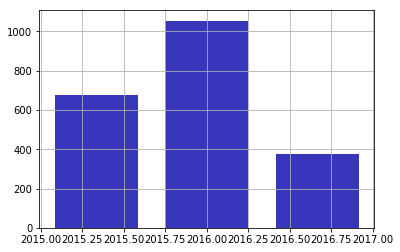

In [160]:
df_wrdclean.timestamp.dt.year.hist(bins=3,color='#0504aa',alpha=0.8,rwidth=0.75)

* Step 2

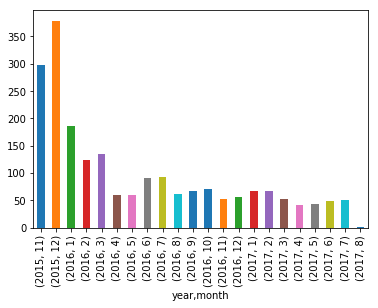

In [186]:
df_wrdclean.groupby([df_wrdclean.timestamp.dt.year.rename('year'), df_wrdclean.timestamp.dt.month.rename('month')])['tweet_id'].count().plot(kind="bar")

### Insight
#### 2. Look for tweet distribution over the years, months, weeks ...

In [182]:
df_wrdclean.groupby(df_wrdclean.timestamp.dt.year).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_stage,ratings,fav_count,retweet_count
timestamp,,,,,,,,,,,,
2015,676,8,8,676,676,676,676,379,66,676,676,676
2016,1054,11,11,1054,1054,1054,1054,724,198,1054,1054,1054
2017,374,3,3,374,374,374,374,283,62,374,374,374


In [161]:
#plt.hist(x=df_wrdclean.timestamp.dt.year,color='#0504aa',alpha=0.7,rwidth=0.85)
df_wrdclean.timestamp.dt.year.value_counts()

2016    1054
2015     676
2017     374
Name: timestamp, dtype: int64

In [146]:
df_wrdclean[df_wrdclean.tweet_id == 890971913173991426]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_stage,ratings,fav_count,retweet_count
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,NaN,1.3,11790,2071


## 5. *** Visualizing Data ***